# Script contents 
## 1. Importing libraries and data 
## 2. Cleaning for exploratory analysis 
## 3. Exploratory analysis and distribution of variables
## 4. Resume
## 5. Saving and exporting

# 1. Importing libraries and data

In [1]:
import pandas as pd 
from pandas import Grouper
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline
import re
import calendar

In [2]:
# Define path

path = r'C:\Users\irikh\iCloudDrive\Data analytics\COURSE DATA ANALYTIC\COURSE DATA IMMERG\A6'

In [3]:
# Import data

cb = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'c_wrangled.csv'), index_col = False)

In [4]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42990 entries, 0 to 42989
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42990 non-null  int64  
 1   bike_id                  42990 non-null  int64  
 2   weekday                  42990 non-null  object 
 3   start_hour               42990 non-null  int64  
 4   start_time               42990 non-null  object 
 5   start_station_id         42990 non-null  int64  
 6   start_station_name       42990 non-null  object 
 7   start_station_latitude   42990 non-null  float64
 8   start_station_longitude  42990 non-null  float64
 9   end_time                 42990 non-null  object 
 10  end_station_id           42990 non-null  int64  
 11  end_station_name         42990 non-null  object 
 12  end_station_latitude     42990 non-null  float64
 13  end_station_longitude    42990 non-null  float64
 14  subscriber            

# 2. Cleaning for exploratory analysis

In [5]:
# Dropping Unnamed column
cb_1 = cb.drop(columns = ['Unnamed: 0', "subscriber", "gender"])

In [6]:
cb_1.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,trip_duration_min
0,16013,Mon,18,09/09/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,1968,16
1,15230,Thu,18,12/09/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,1983,9
2,17942,Wed,19,18/09/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,1989,6
3,19683,Sat,11,28/09/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,1988,9
4,14581,Fri,22,27/09/2013 22:01,293,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432,E 7 St & Avenue A,40.726218,-73.983799,1986,7


In [7]:
# rename columns
cb_1.rename(columns = {'weekday' : 'day_of_week'}, inplace = True)                             

In [8]:
# rename columns
cb_1.rename(columns = {'start_time' : 'ride_start'}, inplace = True)     

In [9]:
# rename columns
cb_1.rename(columns = {'end_time' : 'ride_end'}, inplace = True)  

In [10]:
cb_1.dtypes

bike_id                      int64
day_of_week                 object
start_hour                   int64
ride_start                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
ride_end                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
birth_year                   int64
trip_duration_min            int64
dtype: object

In [11]:
# export 
cb_1.to_csv(os.path.join(path, '02 Data','prepared data', 'c_wrangled1.csv'))

In [12]:
# Import data

cb_1 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'c_wrangled2.csv'), index_col = False)

# 3. Exploratory analysis and distribution of variables

In [13]:
# Rides count per hour
cb_1['start_hour'].value_counts(dropna=False)

start_hour
17    4398
18    4278
8     3127
16    3046
19    2930
9     2598
15    2436
13    2408
14    2401
12    2353
7     1980
20    1932
11    1841
10    1826
21    1371
22    1159
6      889
23     803
0      420
1      266
5      195
2      162
3       96
4       75
Name: count, dtype: int64

In [14]:
# Rides count by day of week 
cb_1["day_of_week"].value_counts(dropna=False)

day_of_week
Mon    6797
Fri    6594
Wed    6489
Tue    6429
Thu    6212
Sun    5505
Sat    4964
Name: count, dtype: int64

<Axes: xlabel='start_hour', ylabel='Count'>

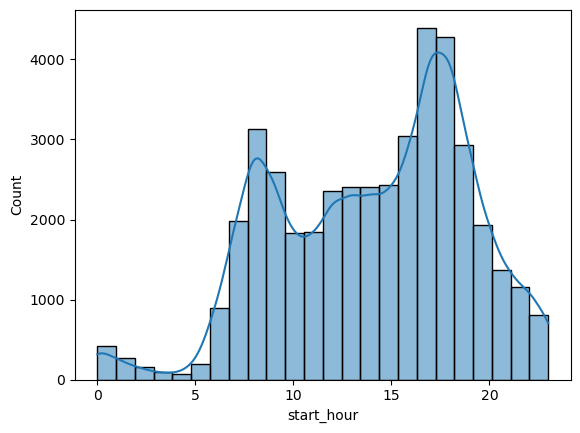

In [15]:
# creating a categorical variable that splits the start hour column into categories
# use histo to visualize distrobution of variables
sns.histplot(cb_1['start_hour'], bins =24, kde= True)

### Most bikerides occurs at 9am till 7 pm. Less occurs from 12am till 6 am.  Pick is about 5-6 pm.

<Axes: xlabel='trip_duration_min', ylabel='Count'>

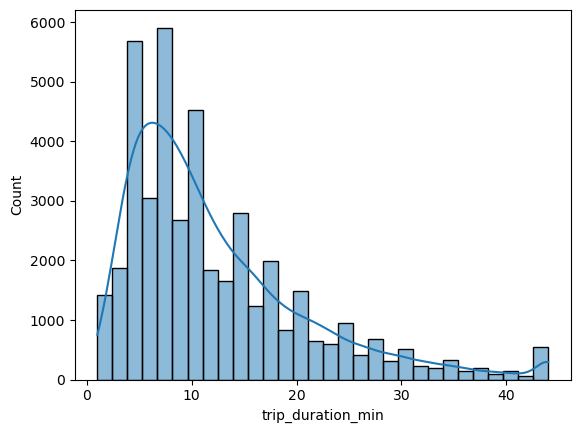

In [16]:
# creating a categorical variable that splits the trip duration column into categories
#use histo to visualize distrobution of variables
sns.histplot(cb_1['trip_duration_min'], bins =30, kde= True)

### Most bike rides lasts from 4 to 9 min. there are not many long lsating bikerides (more that 30 min).

<Axes: xlabel='birth_year', ylabel='Count'>

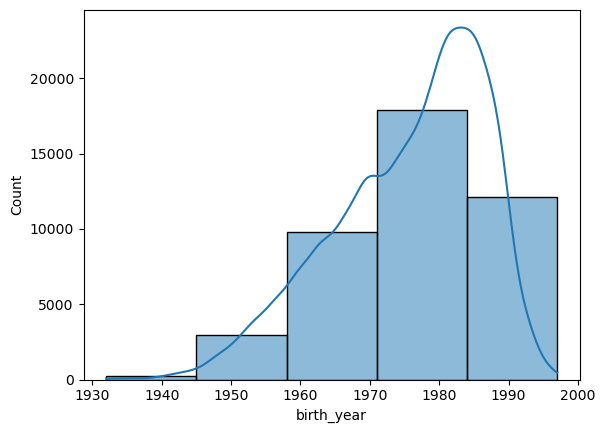

In [17]:
# creating a categorical variable that splits the Birth year column into categories
#use histo to visualize distrobution of variables
sns.histplot(cb_1['birth_year'], bins =5, kde= True)

### Most riders were born between 1970 and 1985.

In [18]:
# Making categories for trip duration
cb_1.loc[cb_1['trip_duration_min'] < 5, 'Trip category'] = 'under 5 minutes'

In [19]:
cb_1.loc[(cb_1['trip_duration_min'] >= 5) & (cb_1['trip_duration_min']<10), 'Trip category'] = '5-10 minutes'

In [20]:
cb_1.loc[(cb_1['trip_duration_min'] >= 10) & (cb_1['trip_duration_min']<15), 'Trip category'] = '10-15 minutes'

In [21]:
cb_1.loc[(cb_1['trip_duration_min'] >= 15) & (cb_1['trip_duration_min']<20), 'Trip category'] = '15-20 minutes'

In [22]:
cb_1.loc[(cb_1['trip_duration_min'] >= 20) & (cb_1['trip_duration_min']<25), 'Trip category'] = '20-25 minutes'

In [23]:
cb_1.loc[cb_1['trip_duration_min'] >= 25, 'Trip category'] = 'over 25 minutes'

In [24]:
cb_1['Trip category'].value_counts(dropna = False)

Trip category
5-10 minutes       14697
10-15 minutes       9455
under 5 minutes     5913
15-20 minutes       5426
over 25 minutes     4262
20-25 minutes       3237
Name: count, dtype: int64

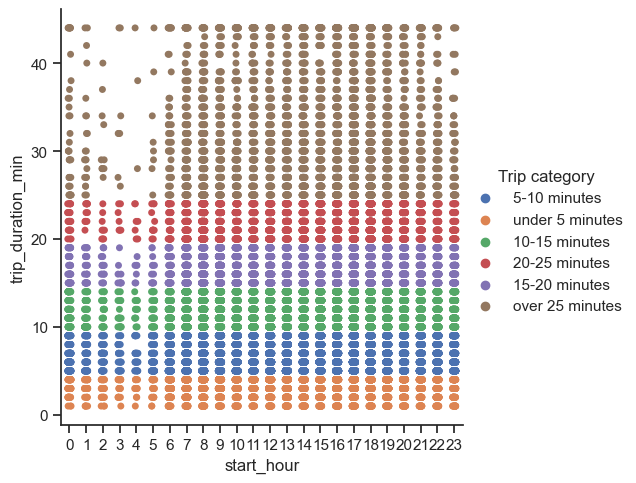

In [25]:
# create categorical plotin seaborn using trip category
sns.set(style="ticks")
g=sns.catplot(x="start_hour", y= "trip_duration_min", hue="Trip category", data=cb_1)

### Most longlasting trips occurs from 9am till 8pm. 

In [26]:
# Export figure()
g.savefig("out4.png")

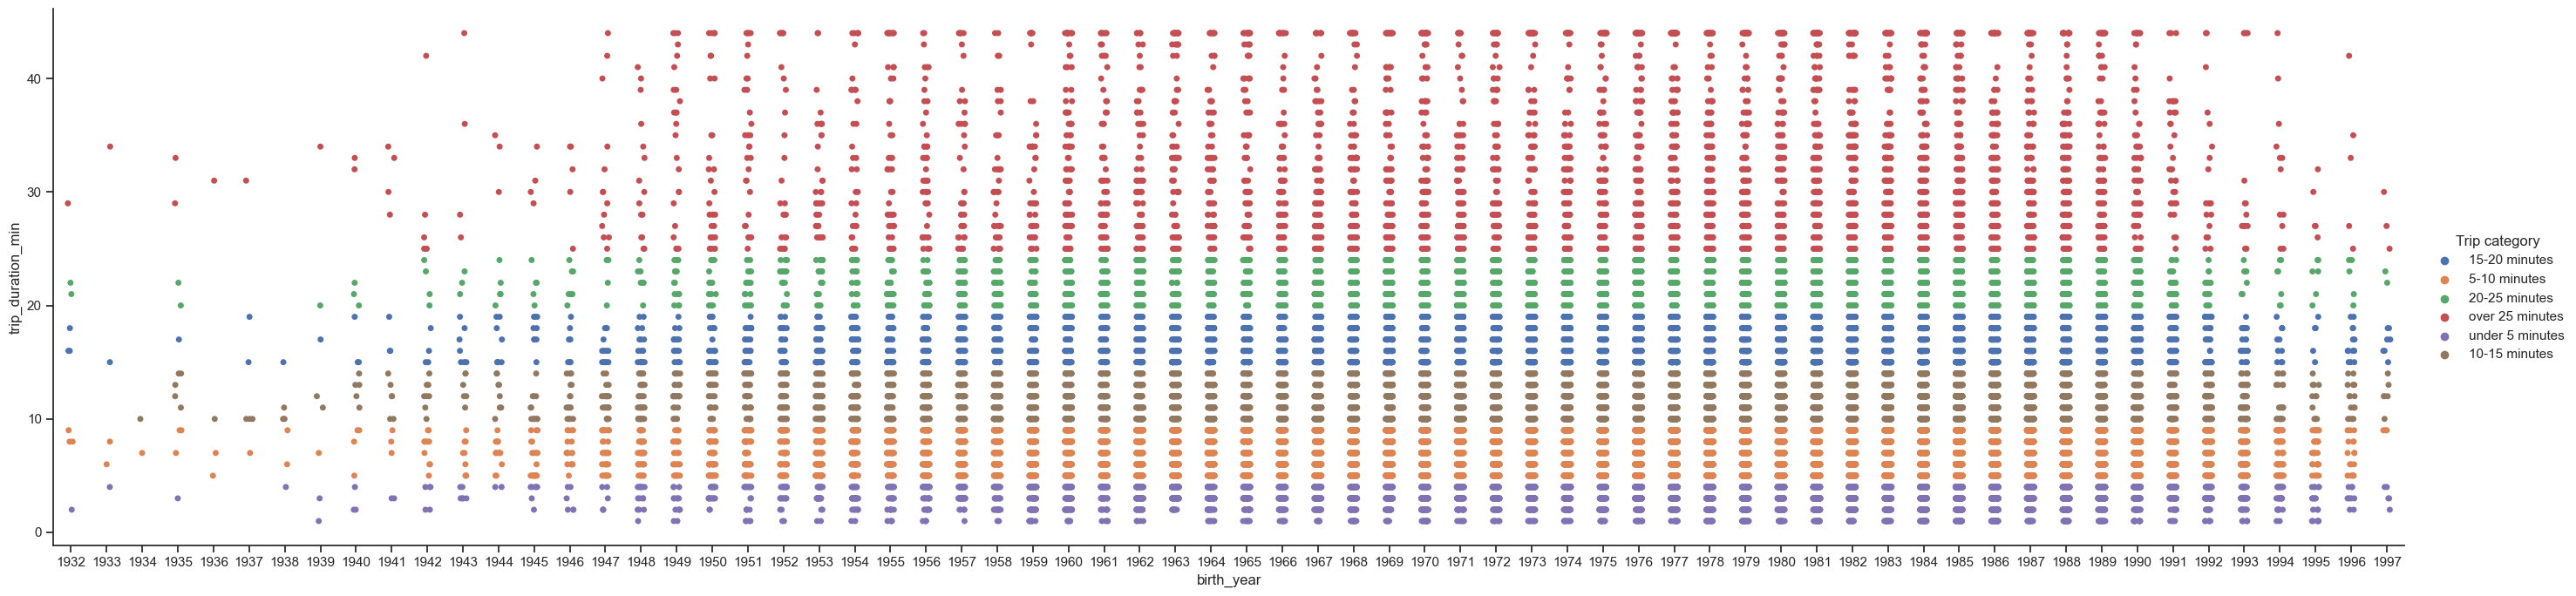

In [27]:
# create categorical plotin seaborn using trip category
sns.set(style="ticks")
g1=sns.catplot(x="birth_year", y= "trip_duration_min", hue="Trip category", data=cb_1, height=7, aspect=4)

In [28]:
# Export figure()
g1.savefig("out5.png")

### Most longlasting rides has perople who was born from 1960 till 1990, which is 23- 53 y.o  

In [29]:
cb_1.loc[cb_1['birth_year'] >= 1989, 'Birth category'] = '18-24'

In [30]:
cb_1.loc[(cb_1['birth_year'] >= 1979 ) & (cb_1['birth_year'] <= 1988), 'Birth category'] = '25-34'

In [31]:
cb_1.loc[(cb_1['birth_year'] >= 1969 ) & (cb_1['birth_year'] <= 1978), 'Birth category'] = '35-44'

In [32]:
cb_1.loc[(cb_1['birth_year'] >= 1959 ) & (cb_1['birth_year'] <= 1968), 'Birth category'] = '45-54'

In [33]:
cb_1.loc[(cb_1['birth_year'] >= 1949 ) & (cb_1['birth_year'] <= 1958), 'Birth category'] = '55-64'

In [34]:
cb_1.loc[(cb_1['birth_year'] >= 1939 ) & (cb_1['birth_year'] <= 1948 ), 'Birth category'] = '65-74'

In [35]:
cb_1.loc[cb_1['birth_year'] <= 1938, 'Birth category'] = '75+'

In [36]:
cb_1 ['Birth category'].value_counts(dropna = False)

Birth category
25-34    16989
35-44    11478
45-54     7186
18-24     3740
55-64     3029
65-74      519
75+         49
Name: count, dtype: int64

In [37]:
cb_1.head()

,Unnamed: 0,bike_id,day_of_week,start_hour,ride_start,ride_start.1,ride_start.2,start_station_id,start_station_name,start_station_latitude,start_station_longitude,ride_end,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,trip_duration_min,Trip category,Birth category
0,0,16013,Mon,18,2013/09/09 18:18,2013-09-09,18:18:00,523,W 38 St & 8 Ave,40.754666,-73.991382,2013/09/09 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,1968,16,15-20 minutes,45-54
1,1,15230,Thu,18,2013/09/12 18:38,2013-09-12,18:38:00,257,Lispenard St & Broadway,40.719392,-74.002472,2013/09/12 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,1983,9,5-10 minutes,25-34
2,2,17942,Wed,19,2013/09/18 19:44,2013-09-18,19:44:00,479,9 Ave & W 45 St,40.760193,-73.991255,2013/09/18 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,1989,6,5-10 minutes,18-24
3,3,19683,Sat,11,2013/09/28 11:54,2013-09-28,11:54:00,527,E 33 St & 1 Ave,40.743156,-73.974347,2013/09/28 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,1988,9,5-10 minutes,25-34
4,4,14581,Fri,22,2013/09/27 22:01,2013-09-27,22:01:00,293,Lafayette St & E 8 St,40.730287,-73.990765,2013/09/27 22:08,432,E 7 St & Avenue A,40.726218,-73.983799,1986,7,5-10 minutes,25-34


# 4. Resume 


### what day is the busiest day for citi bike? 
Monday and then Friday
### what busiest time of day for citi bike?
most 9 am and 6-7 pm, least 1-5 am.
### what age group uses citi bike the most? 
most 30-40 year olds (born bt 1970 and 1980 in 2013) least 60 and older born 1950 and earlier in 2013

# 5. saving and exporting

In [38]:

cb_1.to_csv(os.path.join(path, '02 Data','prepared data', 'c_warngled3.csv'))